In [38]:
from collections import Counter
from random import randint,shuffle,randrange
from math import sqrt
import altair
import pandas as pd
from altair.datasets import load_dataset
%matplotlib inline  

In [39]:
randrange(10)/100

0.02

In [40]:
x = [randint(-10,10) for i in range(500)]
y = [((randrange(10)/100)*i)+i for i in x]

In [41]:
iris = load_dataset('iris')
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


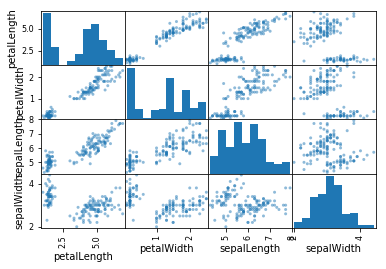

In [44]:
plot = pd.plotting.scatter_matrix(iris)

In [47]:
iris_subset = iris[['sepalWidth','petalLength','species']]

In [48]:
zip(iris_subset['sepalWidth'],iris_subset['petalLength']),iris_subset['species']

,sepalWidth,petalLength,species
0,3.5,1.4,setosa
1,3.0,1.4,setosa
2,3.2,1.3,setosa
3,3.1,1.5,setosa
4,3.6,1.4,setosa


In [ ]:
def vector_subtract(v,w):
    """ subtracts corresponding elements of two vectors """
    return [v_i - w_i for v_i,w_i in zip(v,w)]

def sum_of_squares(v):
    squares = [v_i ** 2 for v_i in v]
    return sum(squares)

def magnitude(v):
    # length of a vector in projection
    # basically get the hypotenuse
    return sqrt(sum_of_squares(v))

def distance(v,w):
    """ distance between two vectors """
    return magnitude(vector_subtract(v,w))

In [47]:
def majority_vote(labels):
    vote_counts = Counter(labels)
    # get the winner and the number of votes it had
    winner, winner_count = vote_counts.most_common(1)[0]
    # get the number of winners that had the winning number of votes
    num_winners = len([count for count
                       in vote_counts.values()
                       if count == winner_count])
    if num_winners == 1:
        return winner # the winner is unique
    else:
        # remove one entry from the labels
        return majority_vote(labels[:-1]) # try agin without the last entry
    
def knn_classify(k, labeled_points,new_point):
    """ each labneled point should be a pair """
    
    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points, key=lambda (point_): distance(point,new_point))
    
    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]
    
    # and then let tm vote
    return majority_vote(k_nearest_labels)

In [48]:
comps = ['Python','R','Go','Python','R']

In [ ]:
knn